In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("train.csv")
print ("data shape: " + str(data.shape))
train, test = train_test_split(data, test_size=0.05)
y_train = np.array(train["label"])
x_train = np.array(train.drop("label", axis = 1))
y_test = np.array(test["label"])
x_test = np.array(test.drop("label", axis = 1))


data shape: (42000, 785)


In [3]:
y_train = y_train.reshape((1, y_train.shape[0]))
x_train = x_train.reshape(x_train.shape[0], -1).T
x_train = x_train / 255

# using one_hot to conver Y label
y_train = np.eye(10)[y_train.reshape(-1)].T

y_test = y_test.reshape((1, y_test.shape[0]))
x_test = x_test.reshape(x_test.shape[0], -1).T
x_test = x_test / 255

# using one_hot to conver Y label
y_test = np.eye(10)[y_test.reshape(-1)].T




In [4]:
x_train.shape

(784, 39900)

In [5]:
y_test.shape

(10, 2100)

In [6]:
# Create Placeholders
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, name="X")
    Y = tf.placeholder(tf.float32, name = "Y")
    
    return X, Y


In [7]:
X, Y = create_placeholders(784, 10)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", dtype=float32)
Y = Tensor("Y:0", dtype=float32)


In [8]:
# Initialize Parameters
def initialize_parameters():
    tf.set_random_seed(1)

    W1 = tf.get_variable("W1", [400,784], initializer = tf.contrib.layers.xavier_initializer(seed =1))
    b1 = tf.get_variable("b1", [400,1], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    W2 = tf.get_variable("W2", [500,400], initializer = tf.contrib.layers.xavier_initializer(seed =1))
    b2 = tf.get_variable("b2", [500,1], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    W3 = tf.get_variable("W3", [250,500], initializer = tf.contrib.layers.xavier_initializer(seed =1))
    b3 = tf.get_variable("b3", [250,1], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    W4 = tf.get_variable("W4", [120,250], initializer = tf.contrib.layers.xavier_initializer(seed =1))
    b4 = tf.get_variable("b4", [120,1], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    W5 = tf.get_variable("W5", [50,120], initializer = tf.contrib.layers.xavier_initializer(seed =1))
    b5 = tf.get_variable("b5", [50,1], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    W6 = tf.get_variable("W6", [10,50], initializer = tf.contrib.layers.xavier_initializer(seed =1))
    b6 = tf.get_variable("b6", [10,1], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    parameters = {"W1":W1, 
                  "b1":b1, 
                  "W2":W2, 
                  "b2":b2, 
                  "W3":W3, 
                  "b3":b3,
                  "W4":W4, 
                  "b4":b4, 
                  "W5":W5, 
                  "b5":b5,
                  "W6":W6,
                  "b6":b6}
    return parameters

In [14]:
def forward_propagation(X, parameters, keep_prob):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
    W6 = parameters['W6']
    b6 = parameters['b6']
    
    Z1 = tf.add(tf.matmul(W1,X), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1), b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2), b3)
    A3 = tf.nn.relu(Z3)
    A3_drop = tf.nn.dropout(A3, keep_prob)
    Z4 = tf.add(tf.matmul(W4,A3_drop), b4)
    A4 = tf.nn.relu(Z4)
    Z5 = tf.add(tf.matmul(W5,A4), b5)
    A5 = tf.nn.relu(Z5)
    Z6 = tf.add(tf.matmul(W6,A5), b6)
    return Z6

In [10]:
# compute cost
def compute_cost(Z3, Y):

    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))

    return cost

In [11]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [16]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.001, num_epochs = 20, minibatch_size = 128, print_cost = True):
    #ops.reset_default_graph
    tf.reset_default_graph()
    tf.set_random_seed
    seed = 3
    (n_x, m) = X_train.shape
    n_y = Y_train.shape[0]
    costs = []
    X = tf.placeholder(tf.float32, name="X")
    Y = tf.placeholder(tf.float32, name = "Y")
    # Dropout
    keep_prob = tf.placeholder("float")

    parameters = initialize_parameters()

    Z3 = forward_propagation(X, parameters, keep_prob)

    cost = compute_cost(Z3, Y)
    
    #Use L2 regularizer
    beta = 0.00005
    regularizer = tf.nn.l2_loss(parameters['W1']) + tf.nn.l2_loss(parameters['W2']) + tf.nn.l2_loss(parameters['W3'])
    
    cost = tf.reduce_mean(cost + beta * regularizer)

    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)

    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)
        print("Num_epochs: ", str(num_epochs))
        for epoch in range(num_epochs):
            epoch_cost = 0
            num_minibatches = int(m / minibatch_size)
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch

                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y, keep_prob:0.8})
                epoch_cost += minibatch_cost / num_minibatches

            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))

            if print_cost == True and epoch % 2 == 0:
                costs.append(epoch_cost)

        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        correct_prediction = tf.equal(tf.argmax(Z3),tf.argmax(Y))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
        print ("Train Accuracy:", accuracy.eval({X: X_train, Y:Y_train, keep_prob:1.0}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y:Y_test, keep_prob:1.0}))

        return parameters

Num_epochs:  20
Cost after epoch 0: 0.354756
Cost after epoch 5: 0.071264
Cost after epoch 10: 0.058170
Cost after epoch 15: 0.051427


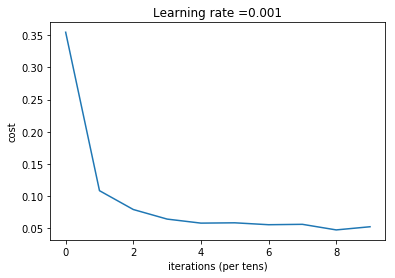

Parameters have been trained!
Train Accuracy: 0.9972431
Test Accuracy: 0.9728571


In [17]:
parameters = model(x_train, y_train, x_test, y_test)